In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Generate data for 3 distributions
random_state = np.random.RandomState(seed=42)
dist_a = random_state.normal(0.8, 0.05, 1000)
dist_b = random_state.normal(0.4, 0.02, 1000)
dist_c = random_state.normal(0.6, 0.1, 1000)

# Concatenate data to simulate a data stream with 2 drifts
stream = np.concatenate((dist_a, dist_b, dist_c))

In [2]:
type(stream)

numpy.ndarray

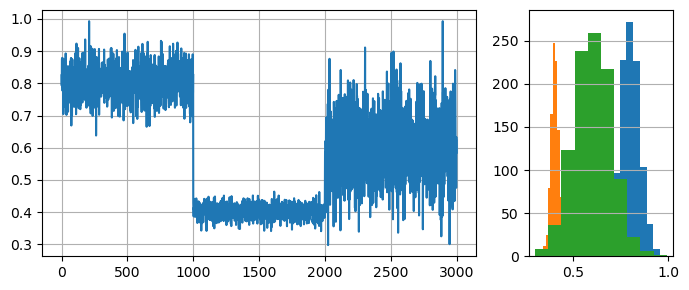

In [3]:
# Auxiliary function to plot the data
def plot_data(dist_a, dist_b, dist_c, drifts=None):
   fig = plt.figure(figsize=(7,3), tight_layout=True)
   gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
   ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
   ax1.grid()
   ax1.plot(stream, label='Stream')
   ax2.grid(axis='y')
   ax2.hist(dist_a, label=r'$dist_a$')
   ax2.hist(dist_b, label=r'$dist_b$')
   ax2.hist(dist_c, label=r'$dist_c$')
   if drifts is not None:
       for drift_detected in drifts:
           ax1.axvline(drift_detected, color='red')
   plt.show()

plot_data(dist_a, dist_b, dist_c)

In [12]:
!pip install river

  Using cached river-0.22.0-cp312-cp312-win_amd64.whl.metadata (9.0 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
Using cached river-0.22.0-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-None:


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified



Change detected at index 1023
Change detected at index 2047


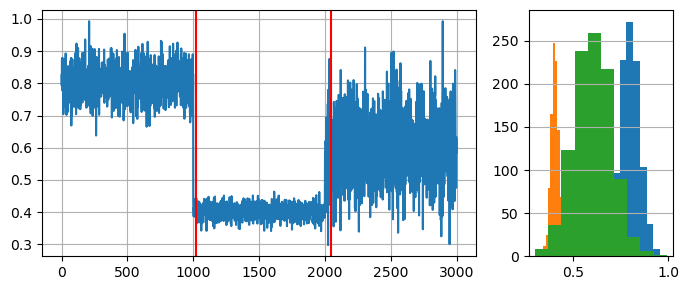

In [15]:
from river import drift
drift_detector = drift.ADWIN()
drifts = []

for i, val in enumerate(stream):
   drift_detector.update(val)   # Data is processed one sample at a time
   if drift_detector.drift_detected:
       # The drift detector indicates after each sample if there is a drift in the data
       print(f'Change detected at index {i}')
       drifts.append(i)
       #drift_detector.reset()   # As a best practice, we reset the detector

plot_data(dist_a, dist_b, dist_c, drifts)

#Output:
#Change detected at index 1055
#Change detected at index 2079

In [16]:
drifts

[1023, 2047]

In [ ]:
import river

In [ ]:
river.__version__

In [ ]:
# Code courtesy - https://deepchecks.com